<a href="https://colab.research.google.com/github/mezenka/pandas-ds1/blob/main/pandas_ds1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data exploration/cleaning/analysis/visualization**

In [15]:
import pandas as pd
import requests
from io import StringIO
import os
import matplotlib.pyplot as plt

##### **Merging multiple csv into single df**

In [ ]:
# Defining the GitHub repository URL
github_url = 'https://raw.githubusercontent.com/mezenka/pandas-ds1/main/data/'

# Fetching the list of csv files from the GitHub repository
response = requests.get(github_url)

# Check if the request was successful and proceed if it was
if response.status_code == 200:
    # Split the response text into lines and extract the file names
    csv_files = response.text.splitlines()

# Checking if the request was successful and proceeding if it was
if response.status_code == 200:
    # Parsing the JSON response containing the repository contents
    #data = response.json()

    # Filtering the URLs to include only the CSV files
    csv_files = [file['name'] for file in data if file['name'].endswith('.csv')]

dfs = []  # List to store DataFrames

for file_name in csv_files:
    url = github_url + file_name
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text
        df = pd.read_csv(StringIO(content))
        dfs.append(df)
    else:
        print(f"Failed to fetch {file_name} from the GitHub repository.")

all_data = pd.concat(dfs, ignore_index=True)

In [20]:
# the same with file names by hand
github_url = 'https://raw.githubusercontent.com/mezenka/pandas-ds1/main/data/'

csv_files = ['Sales_January_2019.csv','Sales_February_2019.csv','Sales_March_2019.csv','Sales_April_2019.csv','Sales_May_2019.csv','Sales_June_2019.csv','Sales_July_2019.csv','Sales_August_2019.csv','Sales_September_2019.csv','Sales_October_2019.csv','Sales_November_2019.csv','Sales_December_2019.csv']

dfs = []

for file_name in csv_files:
    url = github_url + file_name
    response = requests.get(url)

    if response.status_code == 200:
        content = response.text
        df = pd.read_csv(StringIO(content))
        dfs.append(df)
    else:
        print(f"Failed to fetch {file_name} from the GitHub repository.")

all_data = pd.concat(dfs, ignore_index=True)

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


##### **Cleaning and adding calculated columns**

In [21]:
# finding nulls
nulls_df = all_data[all_data.isna().any(axis=1)]
nulls_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184678,NaN,NaN,NaN,NaN,NaN,NaN
184695,NaN,NaN,NaN,NaN,NaN,NaN
185042,NaN,NaN,NaN,NaN,NaN,NaN
185729,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# removing rows with nulls
all_data = all_data.dropna(how='any')
nulls_df = all_data[all_data.isna().any(axis=1)]
# checking if all rows with nulls have been removed
nulls_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [23]:
# adding columns for month and year
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data.head()
# get error "invalid literal for int() with base 10: 'Or'"

ValueError: ignored

In [24]:
# checking for 'Or' in the 'Order Date'
all_data[all_data['Order Date'].str[:2] == 'Or']
# see the data has repeating header row

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
184931,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185070,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185481,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185925,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [25]:
# removing the repeating header row
all_data = all_data[all_data['Order Date'].str[:2] != 'Or']
# checking again
all_data[all_data['Order Date'].str[:2] == 'Or']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [26]:
# trying to add columns for month and year once again
all_data['Month'] = all_data['Order Date'].str[:2]
all_data['Month'] = all_data['Month'].astype('int64')
all_data['Year'] = '20' + all_data['Order Date'].str[6:8]
all_data['Year'] = all_data['Year'].astype('int64')
all_data.head()
# bingo!

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019


In [27]:
# bringing calculable columns to proper data type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019
...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,2019
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,2019
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,2019
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,2019


In [28]:
# calculating sales amount per each Order ID
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019,11.99
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,2019,14.95
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,2019,7.68
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,2019,400.00
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,2019,11.99


In [82]:
# generating column for city
def get_city(address):
  return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,City+State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston,MA,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland,OR,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco,CA,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles,CA,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin,TX,Austin TX


In [83]:
# generating column for state
def get_state(address):
  return address.split(',')[2][1:3]
all_data['Purchase Address'].apply(lambda x: get_state(x))

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,City+State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston,MA,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland,OR,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco,CA,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles,CA,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin,TX,Austin TX


In [84]:
# generating column for city+state
def get_city(address):
  return address.split(',')[1]

def get_state(address):
  return address.split(',')[2][1:3]
  # alternatively: address.split(',')[2].split(' ')[1]

all_data['City+State'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))
# alternatively: all_data['City+State'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} {get_state(x)}")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,City+State
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston,MA,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland,OR,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco,CA,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles,CA,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin,TX,Austin TX


In [89]:
# getting order time
all_data['Order_Date-Time'] = pd.to_datetime(all_data['Order Date'])
all_data['HH'] = all_data['Order_Date-Time'].dt.hour
all_data['MM'] = all_data['Order_Date-Time'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,State,City+State,Order_Date-Time,HH,MM
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,2019,700.00,Boston,MA,Boston MA,2019-01-22 21:25:00,21,25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,2019,14.95,Portland,OR,Portland OR,2019-01-28 14:15:00,14,15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,2019,23.98,San Francisco,CA,San Francisco CA,2019-01-17 13:33:00,13,33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,2019,149.99,Los Angeles,CA,Los Angeles CA,2019-01-05 20:33:00,20,33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,2019,11.99,Austin,TX,Austin TX,2019-01-25 11:59:00,11,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,2019,14.95,San Francisco,CA,San Francisco CA,2019-12-11 20:58:00,20,58
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,2019,7.68,Los Angeles,CA,Los Angeles CA,2019-12-01 12:01:00,12,1
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,2019,400.00,Seattle,WA,Seattle WA,2019-12-09 06:43:00,6,43
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,2019,11.99,Dallas,TX,Dallas TX,2019-12-03 10:39:00,10,39


##### **Analyzing**

In [61]:
# calculating sales per year/month
all_data.groupby(['Year','Month']).sum().sort_values(by='Sales', ascending=False)

<ipython-input-61-c756e07040f8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Year','Month']).sum().sort_values(by='Sales', ascending=False)


Quantity Ordered  Price Each       Sales
Year Month                                          
2019 12                28114  4588415.41  4613443.34
     10                22703  3715554.83  3736726.88
     4                 20558  3367671.02  3390670.24
     11                19798  3180600.68  3199603.20
     5                 18667  3135125.13  3152606.75
     3                 17005  2791207.83  2807100.38
     7                 16072  2632539.56  2647775.76
     6                 15253  2562025.61  2577802.26
     8                 13448  2230345.42  2244467.88
     2                 13449  2188884.72  2202022.42
     9                 13109  2084992.09  2097560.13
     1                 10862  1803264.98  1813586.44
2020 1                    41     8503.40     8670.29

In [58]:
results = all_data.groupby('Month').sum()
results

<ipython-input-58-a5288b5496b3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Year,Sales
Month,,,,
1,10903,1811768.38,19602505,1822256.73
2,13449,2188884.72,24177525,2202022.42
3,17005,2791207.83,30593907,2807100.38
4,20558,3367671.02,36905301,3390670.24
5,18667,3135125.13,33446754,3152606.75
6,15253,2562025.61,27365526,2577802.26
7,16072,2632539.56,28857567,2647775.76
8,13448,2230345.42,24149259,2244467.88
9,13109,2084992.09,23462799,2097560.13


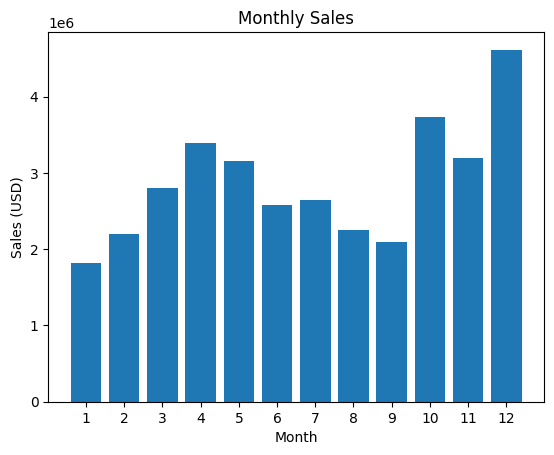

In [33]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales (USD)')
plt.xlabel('Month')
plt.title('Monthly Sales')
plt.show()

In [72]:
# figuring out which city saw the highest amount of sales
results = all_data.groupby('City+State').sum().sort_values(by='Sales', ascending=False)
results

<ipython-input-72-eaf1d12518af>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results = all_data.groupby('City+State').sum().sort_values(by='Sales', ascending=False)


,Quantity Ordered,Price Each,Month,Year,Sales
City+State,,,,,
San Francisco CA,50239,8211461.74,315520,90313920,8262203.91
Los Angeles CA,33289,5421435.23,208325,59772496,5452570.80
New York City NY,27932,4635370.83,175741,50224654,4664317.43
Boston MA,22528,3637409.77,141112,40246750,3661642.01
Atlanta GA,16602,2779908.20,104794,30044739,2795498.58
Dallas TX,16730,2752627.82,104620,29921582,2767975.40
Seattle WA,16553,2733296.01,104941,29743909,2747755.48
Portland OR,11303,1860558.22,70621,20210192,1870732.34
Austin TX,11153,1809873.61,69829,19998197,1819581.75


In [73]:
# plotting sales by city
city_plot = all_data.groupby('City+State').sum()
city_plot

<ipython-input-73-892b73387069>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  city_plot = all_data.groupby('City+State').sum()


,Quantity Ordered,Price Each,Month,Year,Sales
City+State,,,,,
Atlanta GA,16602,2779908.20,104794,30044739,2795498.58
Austin TX,11153,1809873.61,69829,19998197,1819581.75
Boston MA,22528,3637409.77,141112,40246750,3661642.01
Dallas TX,16730,2752627.82,104620,29921582,2767975.40
Los Angeles CA,33289,5421435.23,208325,59772496,5452570.80
New York City NY,27932,4635370.83,175741,50224654,4664317.43
Portland ME,2750,447189.25,17144,4956645,449758.27
Portland OR,11303,1860558.22,70621,20210192,1870732.34
San Francisco CA,50239,8211461.74,315520,90313920,8262203.91


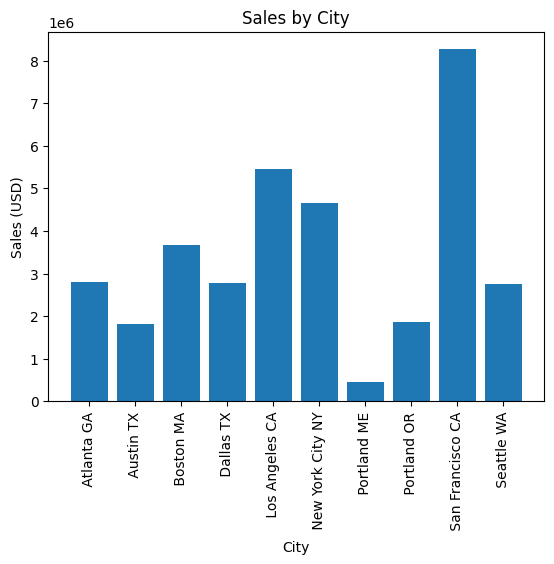

In [81]:
cities = [city for city, df in all_data.groupby('City+State')] # need to be sorted similarly

plt.bar(cities, city_plot['Sales']) # need to be sorted similarly
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales (USD)')
plt.xlabel('City')
plt.title('Sales by City')
plt.show()

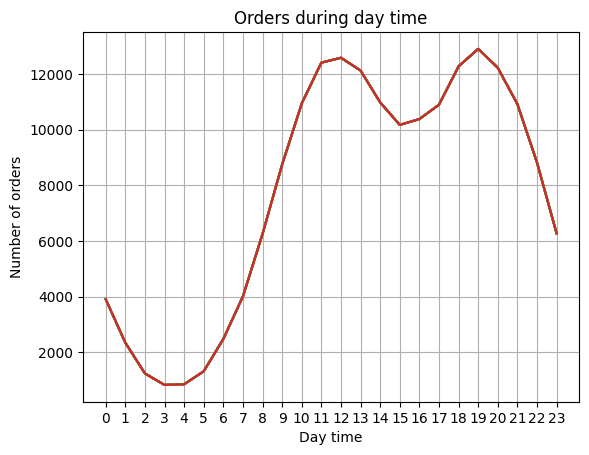

In [103]:
# plotting orders distribution during day time
hours = [hour for hour, df in all_data.groupby('HH')]\

plt.plot(hours, all_data.groupby(['HH']).count())
plt.xticks(hours)
plt.ylabel('Number of orders')
plt.xlabel('Day time')
plt.title('Orders during day time')
plt.grid()
plt.show()

In [99]:
thesales = all_data.groupby(['HH']).sum()
thesales['Sales']

<ipython-input-99-09c4d450e83a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  thesales = all_data.groupby(['HH']).sum()


HH
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Sales, dtype: float64

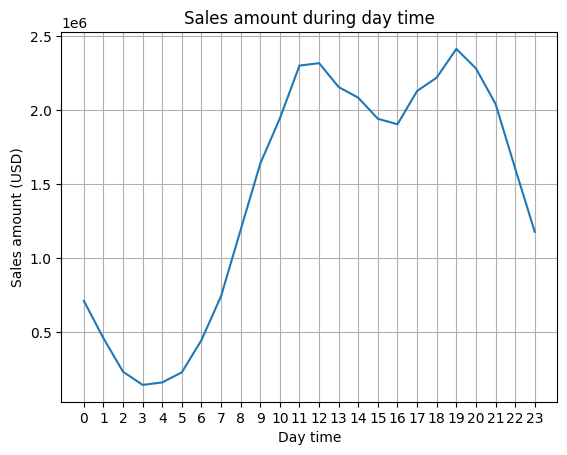

In [174]:
hours = [hour for hour, df in all_data.groupby('HH')]\

plt.plot(hours, thesales['Sales'])
plt.xticks(hours)
plt.ylabel('Sales amount (USD)')
plt.xlabel('Day time')
plt.title('Sales amount during day time')
plt.grid()
plt.show()

In [135]:
# finding the most sold products
prods = all_data.groupby(['Product']).sum().sort_values(by='Sales', ascending=False)
prods[['Quantity Ordered','Sales']]

<ipython-input-135-91ed7f4b2e22>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prods = all_data.groupby(['Product']).sum().sort_values(by='Sales', ascending=False)


,Quantity Ordered,Sales
Product,,
Macbook Pro Laptop,4728,8037600.00
iPhone,6849,4794300.00
ThinkPad Laptop,4130,4129958.70
Google Phone,5532,3319200.00
27in 4K Gaming Monitor,6244,2435097.56
34in Ultrawide Monitor,6199,2355558.01
Apple Airpods Headphones,15661,2349150.00
Flatscreen TV,4819,1445700.00
Bose SoundSport Headphones,13457,1345565.43


<ipython-input-184-a4d1e2f10f13>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qty_ordered = product_group.sum()['Quantity Ordered']
<ipython-input-184-a4d1e2f10f13>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sls_amt = product_group.sum()['Sales']


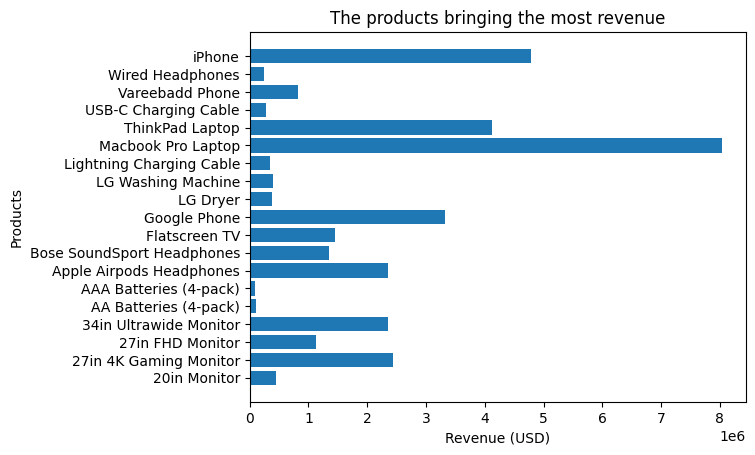

In [184]:
# plotting the most sold products
product_group = all_data.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']
sls_amt = product_group.sum()['Sales']
products = [product for product, df in product_group]
plt.barh(products, sls_amt)
plt.ylabel('Products')
plt.xlabel('Revenue (USD)')
plt.title('The products bringing the most revenue')
#plt.grid()
plt.show()


<ipython-input-212-e66fd86d5c0d>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qty_ordered = product_group.sum()['Quantity Ordered']
<ipython-input-212-e66fd86d5c0d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sls_amt = product_group.sum()['Sales']
<ipython-input-212-e66fd86d5c0d>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=7) # alternatively ax1.xaxis.set_tick_params(rotation=90)


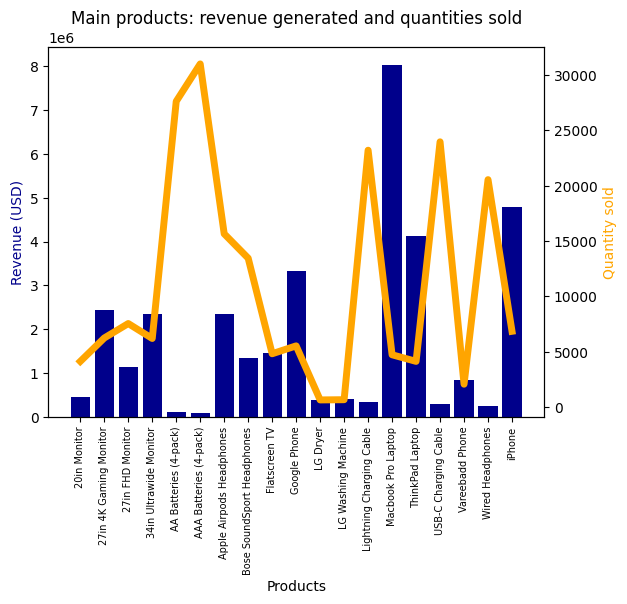

In [212]:
# plotting the most sold products detailing generated revenue and quantities sold
product_group = all_data.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']
sls_amt = product_group.sum()['Sales']
products = [product for product, df in product_group]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, sls_amt, color='darkblue')
ax2.plot(products, qty_ordered, color='orange', linewidth=5)
ax1.set_xlabel('Products')
ax1.set_xticklabels(products, rotation='vertical', size=7) # alternatively ax1.xaxis.set_tick_params(rotation=90)
ax1.set_ylabel('Revenue (USD)', color='darkblue')
ax2.set_ylabel('Quantity sold', color='orange')
plt.title('Main products: revenue generated and quantities sold')
plt.show()

In [213]:
# calculating average price per each product
avg_prices = all_data.groupby('Product').mean()['Price Each']
avg_prices

<ipython-input-213-e404a62c7bd6>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_prices = all_data.groupby('Product').mean()['Price Each']


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<ipython-input-239-026531882624>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  qty_ordered = product_group.sum()['Quantity Ordered']
<ipython-input-239-026531882624>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sls_amt = product_group.sum()['Sales']
<ipython-input-239-026531882624>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=7) # alternatively ax1.xaxis.set_tick_params(rotation=90)
<ipython-input-239-026531882624>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabe

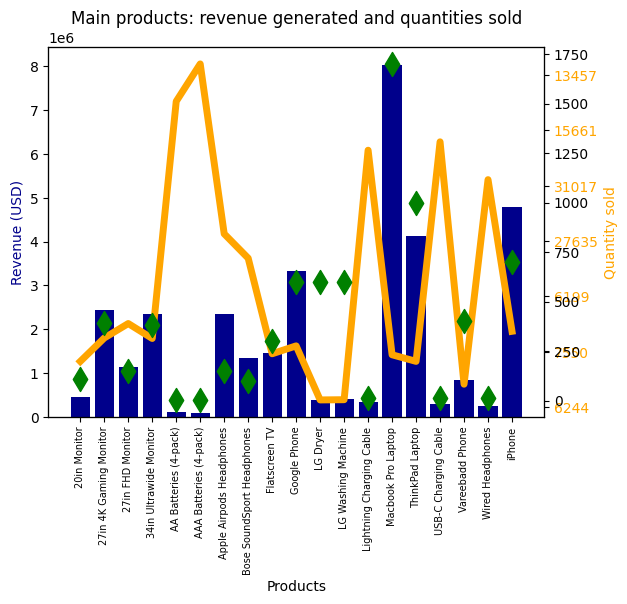

In [239]:
# additionally plotting average price per product
product_group = all_data.groupby('Product')
qty_ordered = product_group.sum()['Quantity Ordered']
sls_amt = product_group.sum()['Sales']
products = [product for product, df in product_group]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax1.bar(products, sls_amt, color='darkblue')
ax2.plot(products, qty_ordered, color='orange', linewidth=5)
ax3.scatter(products, avg_prices, color='green', s=150, marker='d') # 'o', 's', 'D', '^', 'v', '+', 'x', 'p'
ax1.set_xlabel('Products')
ax1.set_xticklabels(products, rotation='vertical', size=7) # alternatively ax1.xaxis.set_tick_params(rotation=90)
ax1.set_ylabel('Revenue (USD)', color='darkblue')
ax2.set_ylabel('Quantity sold', color='orange')
ax2.set_yticklabels(qty_ordered, color='orange')
plt.title('Main products: revenue generated and quantities sold')
plt.show()

In [123]:
# finding products that were sold bundled together
# finding orders with several products on them
dps = all_data[all_data['Order ID'].duplicated(keep=False)] #'keep=False returns values from all duplicate rows with the same order ID
dps['Grouped'] = dps.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x)) # get all products related to one order separated by ','
# but would receive multiple lines for each order
dps = dps[['Order ID','Grouped']].drop_duplicates() # to get single line for each order
dps.head(20)

<ipython-input-123-17185a1cb702>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dps['Grouped'] = dps.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x)) # receive multiple lines for each order


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
228,141457,"iPhone,Apple Airpods Headphones"
250,141478,"Google Phone,Apple Airpods Headphones"
323,141550,"iPhone,Apple Airpods Headphones,Wired Headphones"
362,141587,"USB-C Charging Cable,Apple Airpods Headphones"
421,141645,"Lightning Charging Cable,Wired Headphones"


In [130]:
# calculating number of ocurrences to answer:
# 'which products are most often sold together'
# *using ref: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary*
from itertools import combinations
from collections import Counter

count = Counter()

for row in dps['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # FOR 2 ITEMS SOLD TOGETHER!

for key, value in count.most_common(10):
  print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [132]:
count = Counter()

for row in dps['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3))) # FOR 3 ITEMS SOLD TOGETHER!

for key, value in count.most_common(10):
  print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
